# Mobile 데이터셋 머신러닝 분석

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# 데이터 읽기
# For GitHub files, we need to use the raw content URL
# Convert the regular GitHub URL to a raw URL
url = "https://raw.github.com/MyungKyuYi/AI-class/main/mobile.csv"

# Read the CSV directly into a pandas DataFrame
df = pd.read_csv(url)


# 데이터 확인
print("데이터프레임의 처음 5행:")
print(df.head())
print("\n열 이름:")
print(df.columns)

데이터프레임의 처음 5행:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_scree

In [7]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())


결측치 개수:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [8]:
# 특성과 타겟 분리
X = df.drop('price_range', axis=1)
y = df['price_range']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 의사결정나무
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("의사결정나무 정확도:", accuracy_score(y_test, dt_pred))

의사결정나무 정확도: 0.8325


In [10]:
# 랜덤 포레스트
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("랜덤 포레스트 정확도:", accuracy_score(y_test, rf_pred))

랜덤 포레스트 정확도: 0.8925


In [11]:
# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM 정확도:", accuracy_score(y_test, svm_pred))

SVM 정확도: 0.965


In [12]:
# 로지스틱 회귀
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_pred))

로지스틱 회귀 정확도: 0.655


c:\Users\wlsgh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# 모델 정확도 비교
models = {
    '의사결정나무': accuracy_score(y_test, dt_pred),
    '랜덤 포레스트': accuracy_score(y_test, rf_pred),
    'SVM': accuracy_score(y_test, svm_pred),
    '로지스틱 회귀': accuracy_score(y_test, lr_pred)
}

for model, accuracy in models.items():
    print(f"{model}: {accuracy:.4f}")

의사결정나무: 0.8325
랜덤 포레스트: 0.8925
SVM: 0.9650
로지스틱 회귀: 0.6550


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30756\2186408674.py:15: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30756\2186408674.py:15: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30756\2186408674.py:15: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30756\2186408674.py:15: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30756\2186408674.py:15: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30756\21864

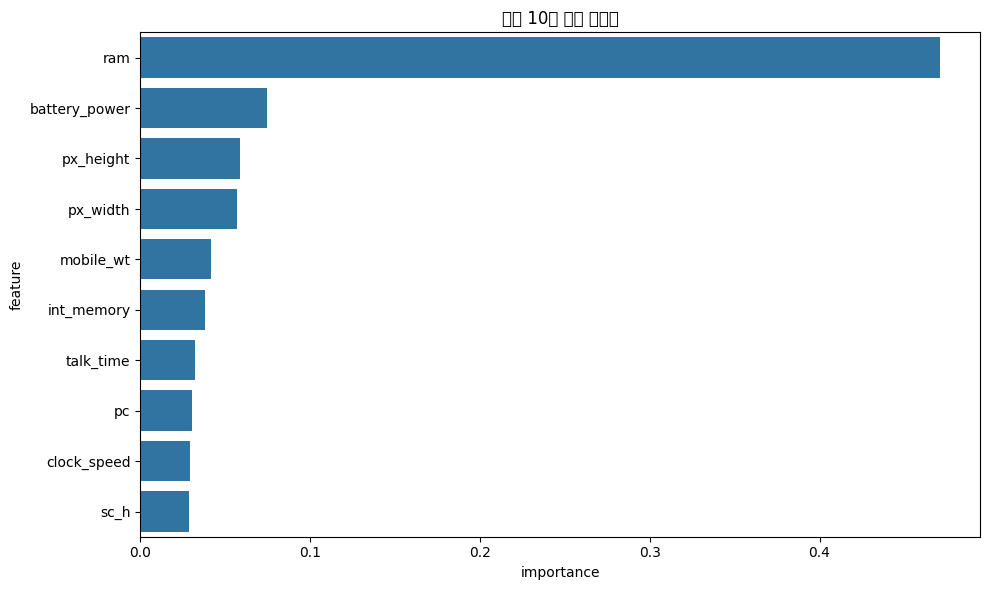

In [14]:
# 특성 중요도 확인 (랜덤 포레스트 기준)
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 추출
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# 상위 10개 특성 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('상위 10개 특성 중요도')
plt.tight_layout()
plt.show()